In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d datamunge/sign-language-mnist

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
 97% 61.0M/62.6M [00:03<00:00, 24.6MB/s]
100% 62.6M/62.6M [00:03<00:00, 17.3MB/s]


In [5]:
!unzip sign-language-mnist

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [6]:
train_data = pd.read_csv('/content/sign_mnist_train.csv')
test_data = pd.read_csv('/content/sign_mnist_test.csv')

In [7]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
train_data.label

,label
0,3
1,6
2,2
3,2
4,13
...,...
27450,13
27451,23
27452,18
27453,17


In [9]:
X_train = train_data.drop("label", axis =1)
y_train = train_data.label.values


X_test = test_data.drop("label", axis =1)
y_test = test_data.label.values
print(y_train.shape )

print(X_train.shape)

(27455,)
(27455, 784)


In [10]:
#  to aviod the problem because there is no class in number 9 so we shift the indices
label_mapping = {
    0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8,
    10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15,
    17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23
}

# Remap the labels
y_train = np.array([label_mapping[label] for label in y_train])
y_test = np.array([label_mapping[label] for label in y_test])
X_train = X_train.values / 255.0
X_test = X_test.values / 255.0

# Reshape the data to fit the CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=24)
y_test = to_categorical(y_test, num_classes=24)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_val, y_val)
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


687/687 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.1091 - loss: 2.9414 - val_accuracy: 0.6591 - val_loss: 1.2300
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.4409 - loss: 1.6975 - val_accuracy: 0.8181 - val_loss: 0.6033
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.5832 - loss: 1.2134 - val_accuracy: 0.8816 - val_loss: 0.4248
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6645 - loss: 0.9510 - val_accuracy: 0.9031 - val_loss: 0.3134
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7111 - loss: 0.8131 - val_accuracy: 0.9293 - val_loss: 0.2131
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7508 - loss: 0.7044 - val_accuracy: 0.9612 - val_loss: 0.1555
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.7815 - loss: 0.6201 - val_accuracy: 0.9776 - val_loss: 0.1019
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8086 - loss: 0.5422 - val_accuracy

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9892 - loss: 0.0268
Test Loss: 0.0269
Test Accuracy: 0.9890


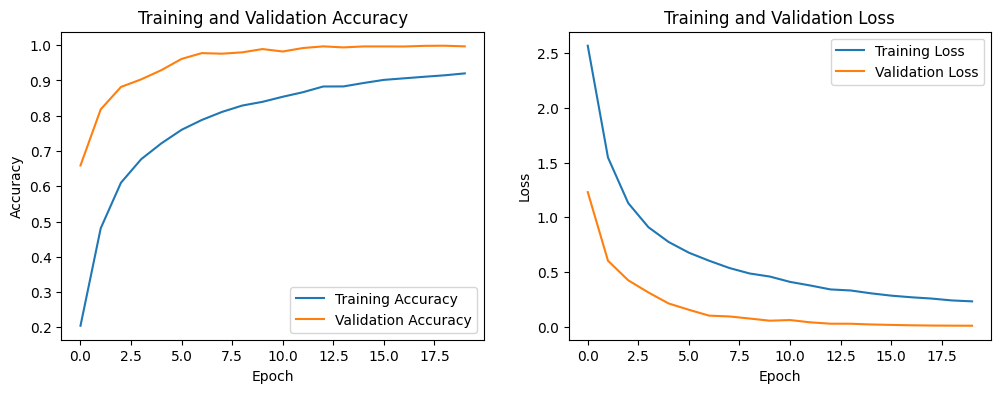

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [19]:
from keras.models import model_from_json

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: dry, normal, oily
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Save the model architecture to JSON
model_json = model.to_json()
with open("sign_language_cnn_model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
model.save_weights("sign_language_cnn_model.weights.h5")

print("Model saved successfully!")

Model saved successfully!
